In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
features = dataset.columns[-2:]

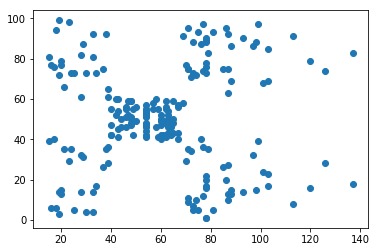

In [7]:
X = dataset[features].values
plt.scatter(X[:, 0], X[:, 1])

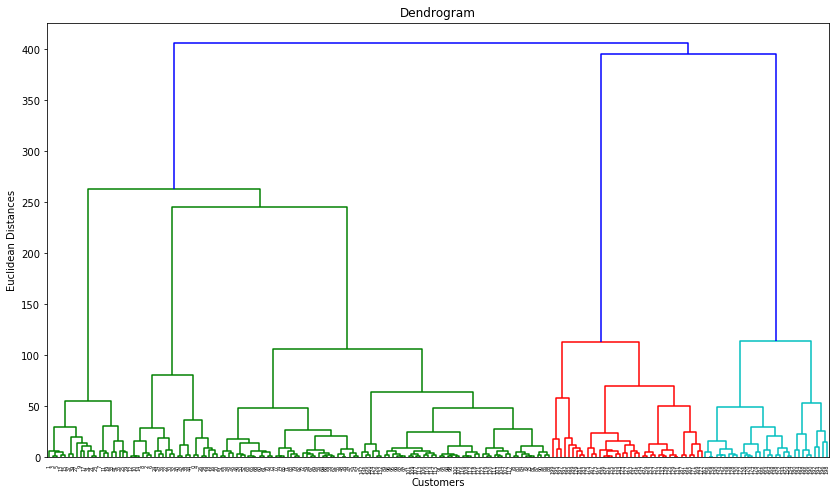

In [10]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean',
                                linkage='ward')
y_hc = hc.fit_predict(X)

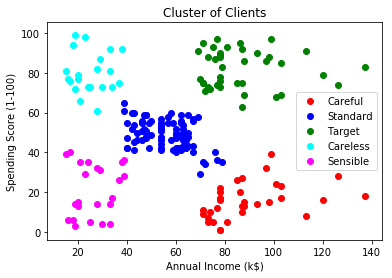

In [15]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], c='red', label='Careful')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], c='blue', label='Standard')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], c='green', label='Target')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], c='cyan', label='Careless')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], c='magenta', label='Sensible')
plt.title('Cluster of Clients')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc='best')